In [151]:
from sklearn.neighbors import KernelDensity
import numpy as np
from matplotlib import pyplot as plt
import collections
import re
import pandas as pd
from functools import reduce

## Using Bag of Words

### The hard way!

In [212]:
doc1 = 'This is the way.'
doc2 = 'We need a buddy cop series of Mando and Grogu. We need it now.'
doc3 = 'How do I binge shows that are one week apart?'

formatted_docs = [ (re.sub(r"[^a-zA-Z0-9]", " ", x.lower()).split()) for x in [doc1, doc2, doc3]]
wordset = reduce(np.union1d, formatted_docs)


def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

bow_calcs = pd.DataFrame([calculateBOW(wordset, x) for x in formatted_docs])

In [213]:
wordset

array(['a', 'and', 'apart', 'are', 'binge', 'buddy', 'cop', 'do', 'grogu',
       'how', 'i', 'is', 'it', 'mando', 'need', 'now', 'of', 'one',
       'series', 'shows', 'that', 'the', 'this', 'way', 'we', 'week'],
      dtype='<U6')

In [214]:
bow_calcs

a  and  apart  are  binge  buddy  cop  do  grogu  how  ...  of  one  \
0  0    0      0    0      0      0    0   0      0    0  ...   0    0   
1  1    1      0    0      0      1    1   0      1    0  ...   1    0   
2  0    0      1    1      1      0    0   1      0    1  ...   0    1   

   series  shows  that  the  this  way  we  week  
0       0      0     0    1     1    1   0     0  
1       1      0     0    0     0    0   2     0  
2       0      1     1    0     0    0   0     1  

[3 rows x 26 columns]

### The easy way! 

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b") ## Why is this needed?
#print(vectorizer.get_feature_names())
X = vectorizer.fit_transform([doc1, doc2, doc3])
bow_df_short = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
bow_df_short

a  and  apart  are  binge  buddy  cop  do  grogu  how  ...  of  one  \
0  0    0      0    0      0      0    0   0      0    0  ...   0    0   
1  1    1      0    0      0      1    1   0      1    0  ...   1    0   
2  0    0      1    1      1      0    0   1      0    1  ...   0    1   

   series  shows  that  the  this  way  we  week  
0       0      0     0    1     1    1   0     0  
1       1      0     0    0     0    0   2     0  
2       0      1     1    0     0    0   0     1  

[3 rows x 26 columns]

### Getting rid of all stop words

In [216]:
vectorizer = CountVectorizer(stop_words='english', token_pattern=u"(?u)\\b\\w+\\b")
X = vectorizer.fit_transform([doc1, doc2, doc3])
bow_df_trimmed = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
bow_df_trimmed.head()

apart  binge  buddy  cop  grogu  mando  need  series  shows  way  week
0      0      0      0    0      0      0     0       0      0    1     0
1      0      0      1    1      1      1     2       1      0    0     0
2      1      1      0    0      0      0     0       0      1    0     1

## Normalization

In [217]:
bow_df_trimmed.sum(axis = 1)

0    1
1    7
2    4
dtype: int64

In [218]:
norm_factor_l1=np.linalg.norm(bow_df_trimmed.values,axis=1, ord = 1)
norm_factor_l2= np.linalg.norm(bow_df_trimmed.values,axis=1, ord = 2)

In [224]:
norm_factor_l2

array([1., 3., 2.])

In [228]:
normed_matrix = bow_df_trimmed.divide(norm_factor_l1, axis = "rows")
normed_matrix

apart  binge     buddy       cop     grogu     mando      need    series  \
0   0.00   0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.00   0.00  0.142857  0.142857  0.142857  0.142857  0.285714  0.142857   
2   0.25   0.25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

   shows  way  week  
0   0.00  1.0  0.00  
1   0.00  0.0  0.00  
2   0.25  0.0  0.25

### An exploration of kernels

In [92]:
X = np.array([1,2,3,8,9,10]).reshape(-1, 1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 8],
       [ 9],
       [10]])

(array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

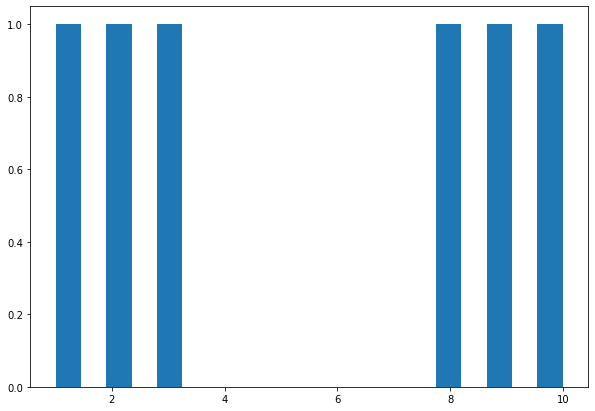

In [133]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(X, bins= 20)

In [125]:
kde05 = KernelDensity(kernel='tophat', bandwidth=.5).fit(X) #this is uniform kernel
kde1 = KernelDensity(kernel='tophat', bandwidth=1).fit(X) 
kde15 = KernelDensity(kernel='tophat', bandwidth=1.5).fit(X)

In [124]:
#np.exp(kde05.score_samples([[3]]))
#np.exp(kde15.score_samples([[3]]))
#np.exp(kde1.score_samples([[3]]))

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(
        X_plot[:, 0],
        np.exp(kde1.score_samples(X_plot)))


In [118]:
np.exp(kde1.score_samples([[2]]))

array([0.08333333])

In [ ]:
# Now lets combine them.

Using: KernelDensity(bandwidth=0.5, kernel='tophat')
Using: KernelDensity(bandwidth=1, kernel='tophat')
Using: KernelDensity(bandwidth=1.5, kernel='tophat')
Using: KernelDensity(bandwidth=1)


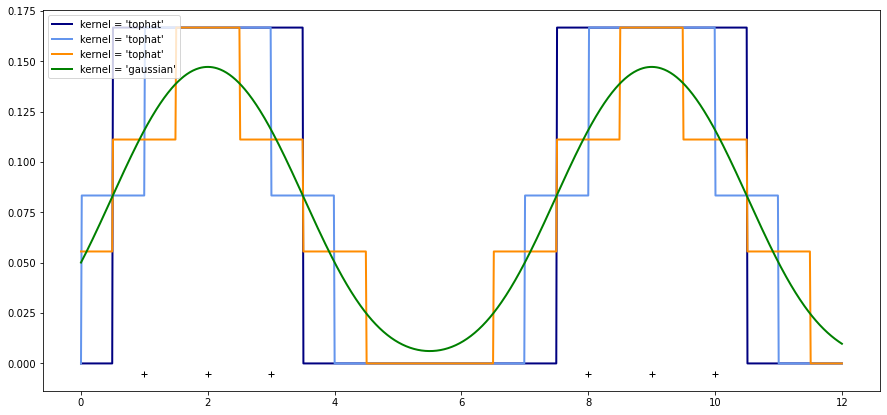

In [108]:
fig, ax = plt.subplots(figsize =(15, 7))
colors = ["navy", "cornflowerblue", "darkorange", "green"]
bandwidth = [0.5, 1, 1.5, 1]
kernel = ["tophat", "tophat", "tophat", "gaussian"]
kde_estimates = []
for color, bandwidth, kernel in zip(colors, bandwidth, kernel):
     kde_estimates.append(KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X))
     print("Using: " + str(kde_estimates[-1]))
     ax.plot(
        X_plot[:, 0],
        np.exp(kde_estimates[-1].score_samples(X_plot)),
        color=color,
        lw=2,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )
        
ax.legend(loc="upper left")
ax.plot(X[:, 0], [-0.005]*6 , "+k")